In [67]:
import matplotlib.pyplot as plt

from machine_perception.datasets.MOSE_train_dataset import MOSE_Train
from machine_perception.datasets.MOSE_eval_dataset import MOSE_Eval
from torch.utils.data import DataLoader
from pathlib import Path


DATA_DIR = Path().resolve().parents[2] / "data"

In [68]:
mose_train_dataset = MOSE_Train(
    root=DATA_DIR, split="train", meta_file="meta_train_split.json", dynamic_merge=False 
)

mose_eval_dataset = MOSE_Eval(
    root=DATA_DIR,
    split="val",
    result_root=DATA_DIR / "mose_eval_results",
)

Video Num: 1205 X 1


In [69]:
mose_train_dataset_loader = DataLoader(
    dataset=mose_train_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=4,
    multiprocessing_context="forkserver"
)

mose_eval_dataset_loader = DataLoader(
    dataset=mose_eval_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=4,
    multiprocessing_context="forkserver"
)

In [70]:
train_iter = iter(mose_train_dataset_loader)
test_iter = iter(mose_eval_dataset)

In [71]:
train_sample_a = next(train_iter)
train_sample_b = next(train_iter)


In [72]:
train_sample_a.keys()

dict_keys(['ref_img', 'prev_img', 'curr_img', 'ref_label', 'prev_label', 'curr_label', 'meta'])

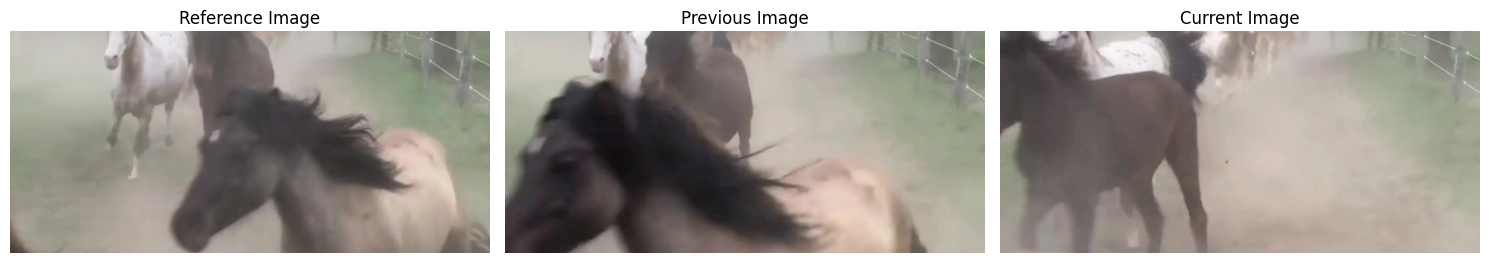

In [73]:
# Assuming these are numpy arrays or PyTorch tensors (e.g., shape: CxHxW or HxWxC)
ref_img = train_sample_b['ref_img']
prev_img = train_sample_b['prev_img']
curr_img = train_sample_b['curr_img']

# If they are torch tensors, convert to numpy and transpose if needed
def prepare_image(img):
    if hasattr(img, 'numpy'):  # PyTorch tensor
        img = img[0] if img.ndim == 4 else img  # get rid of batch dim if exists
        if img.ndim == 3 and img.shape[0] in [1, 3]:  # C, H, W
            img = img.permute(1, 2, 0)  # → H, W, C
        img = img.numpy().astype('uint8')
    return img


ref_img = prepare_image(ref_img)
prev_img = prepare_image(prev_img)
curr_img = prepare_image(curr_img[0])

# Plot the images side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(ref_img, cmap='gray' if ref_img.ndim == 2 else None)
axs[0].set_title("Reference Image")
axs[0].axis('off')

axs[1].imshow(prev_img, cmap='gray' if prev_img.ndim == 2 else None)
axs[1].set_title("Previous Image")
axs[1].axis('off')

axs[2].imshow(curr_img, cmap='gray' if curr_img.ndim == 2 else None)
axs[2].set_title("Current Image")
axs[2].axis('off')

plt.tight_layout()
plt.show()


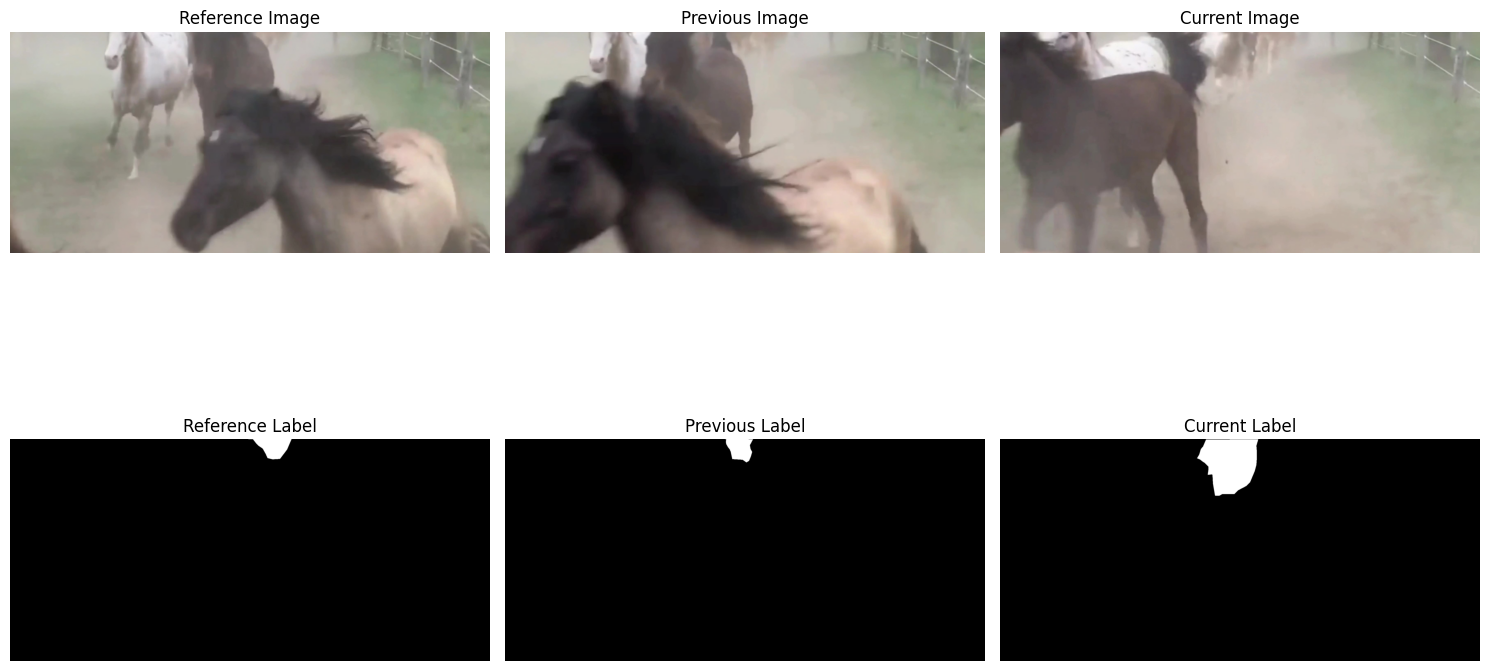

In [74]:
# Load labels
ref_label = train_sample_b['ref_label']
prev_label = train_sample_b['prev_label']
curr_label = train_sample_b['curr_label']

# Prepare labels
ref_label = prepare_image(ref_label)
prev_label = prepare_image(prev_label)
curr_label = prepare_image(curr_label)

# Fix grayscale shape if needed
def squeeze_if_needed(img):
    if img.ndim == 3 and img.shape[2] == 1:
        img = img.squeeze(2)
    return img

ref_label = squeeze_if_needed(ref_label)
prev_label = squeeze_if_needed(prev_label)
curr_label = squeeze_if_needed(curr_label[0][0])

# Create 2 rows: images (top), labels (bottom)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Top row: images
axs[0, 0].imshow(ref_img, cmap='gray' if ref_img.ndim == 2 else None)
axs[0, 0].set_title("Reference Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(prev_img, cmap='gray' if prev_img.ndim == 2 else None)
axs[0, 1].set_title("Previous Image")
axs[0, 1].axis('off')

axs[0, 2].imshow(curr_img, cmap='gray' if curr_img.ndim == 2 else None)
axs[0, 2].set_title("Current Image")
axs[0, 2].axis('off')

# Bottom row: labels
axs[1, 0].imshow(ref_label, cmap='gray')  # or 'nipy_spectral' for classes
axs[1, 0].set_title("Reference Label")
axs[1, 0].axis('off')

axs[1, 1].imshow(prev_label, cmap='gray')
axs[1, 1].set_title("Previous Label")
axs[1, 1].axis('off')

axs[1, 2].imshow(curr_label, cmap='gray')
axs[1, 2].set_title("Current Label")
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [75]:
test_sample_a = next(test_iter)
test_sample_b = next(test_iter)
test_sample_c = next(test_iter)

test_sample_1 = test_sample_c[0]
test_sample_2 = test_sample_c[1]

In [76]:
test_sample_1.keys()

dict_keys(['current_img', 'current_label', 'meta'])

In [77]:
plt.imshow(test_sample_1["current_img"].astype(np.uint8))

NameError: name 'np' is not defined

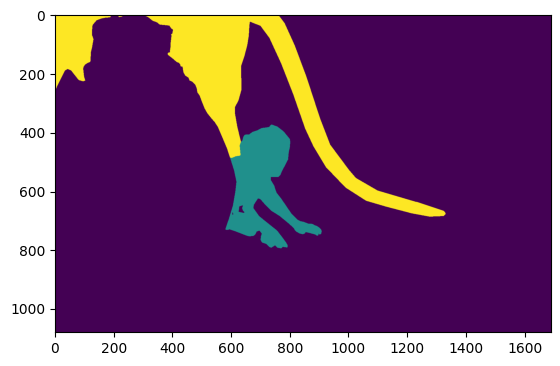

In [ ]:
plt.imshow(test_sample_1["current_label"].astype(np.uint8))

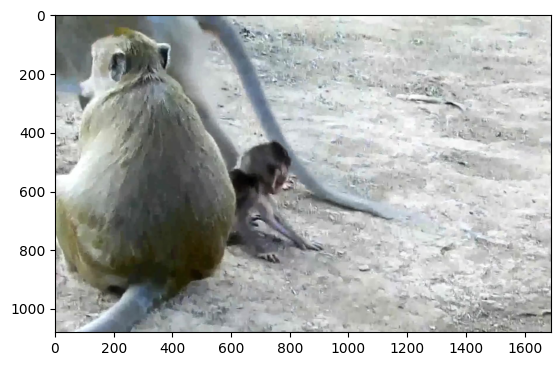

In [ ]:
plt.imshow(test_sample_2["current_img"].astype(np.uint8))

In [ ]:
test_sample_2.keys()

dict_keys(['current_img', 'meta'])

In [ ]:
test_sample_2['meta']

{'seq_name': np.str_('012b09a0'),
 'frame_num': 70,
 'obj_num': 2,
 'current_name': np.str_('00001.jpg'),
 'height': 1080,
 'width': 1690,
 'flip': False,
 'obj_idx': [0, np.uint8(1), np.uint8(2)]}